In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
df.shape

(30, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [5]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [6]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [7]:
x = df['YearsExperience']
y = df['Salary']

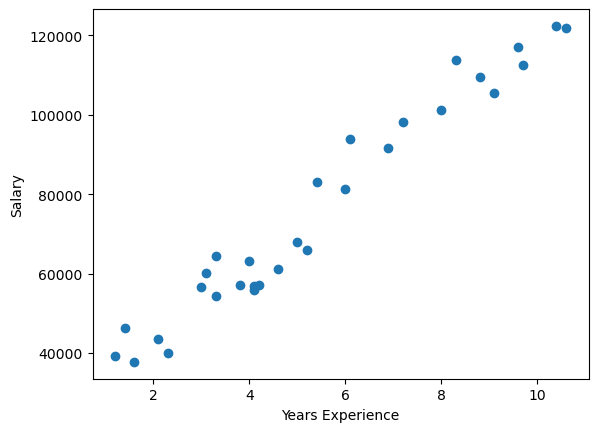

In [8]:
#plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()

In [9]:
def linear_regression(x, y):
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

In [10]:
N = len(x)
x_mean = x.mean()
y_mean = y.mean()

In [11]:
B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den

In [12]:
B0 = y_mean - (B1 * x_mean)

In [13]:
def corr_coef(x,y):
    N = len(x)
    
    num = (N * (x*y) - (x.sum() * y.sum()))
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [14]:
B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
R = corr_coef(x, y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = 24848.2039665232 + 9449.962β
Correlation Coef.:  0    -5.449863
1    -5.442118
2    -5.444031
3    -5.430276
4    -5.430122
5    -5.395472
6    -5.388141
7    -5.391154
8    -5.376527
9    -5.374466
10   -5.358707
11   -5.369397
12   -5.367283
13   -5.364528
14   -5.346191
15   -5.320227
16   -5.318604
17   -5.271921
18   -5.254412
19   -5.216802
20   -5.190226
21   -5.157173
22   -5.111586
23   -5.052095
24   -5.043960
25   -5.044933
26   -4.973083
27   -4.986532
28   -4.906614
29   -4.898203
dtype: float64
"Goodness of Fit":  0     29.701009
1     29.616643
2     29.637474
3     29.487899
4     29.486228
5     29.111117
6     29.032067
7     29.064537
8     28.907043
9     28.884884
10    28.715745
11    28.830419
12    28.807728
13    28.778158
14    28.581758
15    28.304813
16    28.287550
17    27.793154
18    27.608848
19    27.215019
20    26.938447
21    26.596433
22    26.128315
23    25.523659
24    25.441529
25    25.451350
26    24.731553
27    24.865